<a href="https://colab.research.google.com/github/ysusecheo93/Time-Series/blob/main/student_copy_time_series_forecasting_bootcamp_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1v-KLyR-89KByWUdTJWsbemBL7OuEfIXK">

**Which of the following do you think is an example of time series? Even if you don’t know, try making a guess.**

<img src="https://drive.google.com/uc?id=1uEEd6qT_mJ3x39AJqnzJy4vWwkL8CaIF">

``Time Series is generally data which is collected over time and is dependent on it.``

Here we see that the count of cars is independent of time, hence it is not a time series. While the CO2 level increases with respect to time, hence it is a time series.

A series of data points collected in time order is known as a time series. ``Most of business houses work on time series data`` to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.

``What is time series?``
--

> Time series is a collection of data points that are collected at constant time intervals.

> It is time dependent.

> Most of time series have some form of ``seasonality trends``. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends. `( Google : "icrecream sales time series data" )`

> Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

> ``Examples``:  What do these applications have in common: predicting the electricity consumption of a household for the next three months, estimating traffic on roads at certain periods, and predicting the price at which a stock will trade on the New York Stock Exchange?

> They all fall under the concept of time series data! You cannot accurately predict any of these results without the ‘time’ component. And as more and more data is generated in the world around us, time series forecasting keeps becoming an ever more critical technique for a data scientist to master.

### Different types of data could be :

> **Univariate** : This type of time Series data consists of only one variable. _The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes._ **`( Example : Google "bse today live" - see the chart )`**

> **Bivariate** : This type of data involves two different variables.  It has more than one time-dependent variable. _Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values._

> **Multivariate** : Same as above. This type of data involves three or more variables.

**( IMPORTANT SOURCE of time series data : https://archive.ics.uci.edu/ml/datasets.php )**

## Types of Forecast : One-Step and Multi-Step Forecasting

Generally, time series forecasting describes predicting the observation at the next time step. This is called a one-step forecast ( or **`single step forecast`** ), as only one time step is to be predicted.

There are some time series problems where multiple time steps must be predicted. **`These are called multiple-step or multi-step time series forecasting problems`**.

<h3> In this <font color='blue'><b>Suven</b> Time Series NOTEBOOK</font> the learner would understand one of the easiest ways of forecasting their sales data with the Random-Forest-Regressor. </h3>

<small> <b>Kind Note :</b>  <br />
Before exploring machine learning methods for time series, it is a good idea to ensure you have exhausted classical linear time series forecasting methods like :  <br />
<pre>
1. Autoregression (AR)
2. Moving Average (MA)
3. Autoregressive Moving Average (ARMA)
4. Autoregressive Integrated Moving Average (ARIMA)
5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
7. Vector Autoregression (VAR)
8. Vector Autoregression Moving-Average (VARMA)
9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
10. Simple Exponential Smoothing (SES)
11. Holt Winter’s Exponential Smoothing (HWES)

( Above uses <b>Statsmodels</b> library. The APIs for this library can be tricky for beginners (trust me!) )
</pre>
</small>

### Brief about Random Forest Ensemble ML Algo :

Random Forest is a popular and effective ensemble machine learning algorithm.

It is widely used for classification and regression predictive modeling problems.

**`Random Forest can also be used for time series forecasting`**, <font color= 'red'>although it requires that the time series dataset be transformed into a supervised learning problem first.</font> It also requires the use of a specialized technique for evaluating the model called **`walk-forward validation`**, as evaluating the model using k-fold cross validation would result in optimistically biased results.

In [ ]:
!pip install germanholidays
## https://pypi.org/project/germanholidays/

  Created wheel for germanholidays: filename=germanholidays-0.3-py3-none-any.whl size=4905 sha256=c273dc5811a2bc17f1f6b1db541bfa851f65753df86035b1b530608b5c976c13
  Stored in directory: /root/.cache/pip/wheels/75/74/62/bd31a3efeb1fd1e0fadcf4a58fbf63a56bfe9919782f1f6c92
Successfully built germanholidays


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from german_holidays import get_german_holiday_calendar
from pandas.tseries.offsets import *
from plotly import tools

In [ ]:
#Creating German Holidays
cal_cls = get_german_holiday_calendar('NW')
cal = cal_cls()
ger_holidays = [d.date() for d in cal.holidays()]

In [ ]:
## data Source : https://drive.google.com/file/d/1kk44ja36t_Xi_wmYIpDaT1HexR48aPsK/view?usp=sharing
## upload SalesData.xlsx
from google.colab import files
file = files.upload()

Saving SalesData.xlsx to SalesData.xlsx


In [ ]:
## Data Source : https://drive.google.com/file/d/1tCtnTauUComf0o0AU9Z66KhuUfSK4AKG/view?usp=sharing
## upload predictionempty.xlsx
from google.colab import files
file2 = files.upload()

Saving predictionempty.xlsx to predictionempty.xlsx


In [ ]:
#Importing Data
df=pd.read_excel('SalesData.xlsx',parse_dates=True, squeeze=True)
test=pd.read_excel('predictionempty.xlsx',parse_dates=True, squeeze=True)

In [ ]:
## Our given Dataset looks as follows:


,From,Sold Units
0,2013-01-01 00:00:00,3
1,2013-01-01 00:15:00,9
2,2013-01-01 00:30:00,15
3,2013-01-01 01:00:00,6
4,2013-01-01 01:15:00,6


In [ ]:
df.shape

(186347, 2)

In [ ]:
df.tail()

,From,Sold Units
186342,2019-09-29 22:45:00,12
186343,2019-09-29 23:00:00,12
186344,2019-09-29 23:15:00,6
186345,2019-09-29 23:30:00,9
186346,2019-09-29 23:45:00,9


In [ ]:
test.head()

,Date,Sales
0,2019-09-30,NaN
1,2019-10-01,NaN
2,2019-10-02,NaN
3,2019-10-03,NaN
4,2019-10-04,NaN


In [ ]:
test.shape

(48, 2)

In [ ]:
test.tail()

,Date,Sales
43,2019-11-12,NaN
44,2019-11-13,NaN
45,2019-11-14,NaN
46,2019-11-15,NaN
47,2019-11-16,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186347 entries, 0 to 186346
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   From        186347 non-null  datetime64[ns]
 1   Sold Units  186347 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 MB


We have a timestamp row and a Sold Units row. Our aim is to predict the sales volume for the next month. So using 15-Minutes timestamps is not helping much in this case. **We should sum up the data to daily values in the next steps**.

In [ ]:
# fetching date part from date-time part


## If df['From'] is not in Date format only then run the below code
## df['Date'] = pd.to_datetime(df['From']).dt.date

In [ ]:
df.head()

,From,Sold Units,Date
0,2013-01-01 00:00:00,3,2013-01-01
1,2013-01-01 00:15:00,9,2013-01-01
2,2013-01-01 00:30:00,15,2013-01-01
3,2013-01-01 01:00:00,6,2013-01-01
4,2013-01-01 01:15:00,6,2013-01-01


In [ ]:
# Grouping by Date and then only fetching one column --> 'Sold Units'



,Date,Sold Units
0,2013-01-01,2319
1,2013-01-02,25179
2,2013-01-03,26097
3,2013-01-04,25737
4,2013-01-05,11385


In [ ]:
# Extracting More info
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['WeekDay'] = pd.to_datetime(df['Date']).dt.dayofweek

In [ ]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay
0,2013-01-01,2319,2013,1,1,1
1,2013-01-02,25179,2013,1,2,2
2,2013-01-03,26097,2013,1,3,3
3,2013-01-04,25737,2013,1,4,4
4,2013-01-05,11385,2013,1,5,5


In [ ]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.isocalendar().week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

In [ ]:
test.head()

,Date,Sales,Year,Week,Day,WeekDay
0,2019-09-30,NaN,2019,40,30,0
1,2019-10-01,NaN,2019,40,1,1
2,2019-10-02,NaN,2019,40,2,2
3,2019-10-03,NaN,2019,40,3,3
4,2019-10-04,NaN,2019,40,4,4


As we know so far from the qualitative analysis in our specific dataset `there are days which can be marked as outliers` and have a bad impact on the forecasted values.

*These are the national holidays, in our example the holidays in Germany. That’s why we will first filter out all the holidays from our given dataset and we will not forecast future holidays.*

In [ ]:
#Checking the Holidays



In [ ]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Holiday
0,2013-01-01,2319,2013,1,1,1,True
1,2013-01-02,25179,2013,1,2,2,False
2,2013-01-03,26097,2013,1,3,3,False
3,2013-01-04,25737,2013,1,4,4,False
4,2013-01-05,11385,2013,1,5,5,False


In [ ]:
#Removing the Holidays
df=df[df['Holiday']==False]
test=test[test['Holiday']==False]

In [ ]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Holiday
1,2013-01-02,25179,2013,1,2,2,False
2,2013-01-03,26097,2013,1,3,3,False
3,2013-01-04,25737,2013,1,4,4,False
4,2013-01-05,11385,2013,1,5,5,False
5,2013-01-06,6246,2013,1,6,6,False


In [ ]:
#Adding Weekend
df['Weekend']=df.WeekDay.isin([5,6]).astype(int)
test['Weekend']=test.WeekDay.isin([5,6]).astype(int)

In [ ]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Holiday,Weekend
1,2013-01-02,25179,2013,1,2,2,False,0
2,2013-01-03,26097,2013,1,3,3,False,0
3,2013-01-04,25737,2013,1,4,4,False,0
4,2013-01-05,11385,2013,1,5,5,False,1
5,2013-01-06,6246,2013,1,6,6,False,1


In [ ]:
#Dropping the Holiday columns
df.drop(['Holiday'],axis=1,inplace=True)
test.drop(['Holiday'],axis=1,inplace=True)

In [ ]:
df.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Weekend
1,2013-01-02,25179,2013,1,2,2,0
2,2013-01-03,26097,2013,1,3,3,0
3,2013-01-04,25737,2013,1,4,4,0
4,2013-01-05,11385,2013,1,5,5,1
5,2013-01-06,6246,2013,1,6,6,1


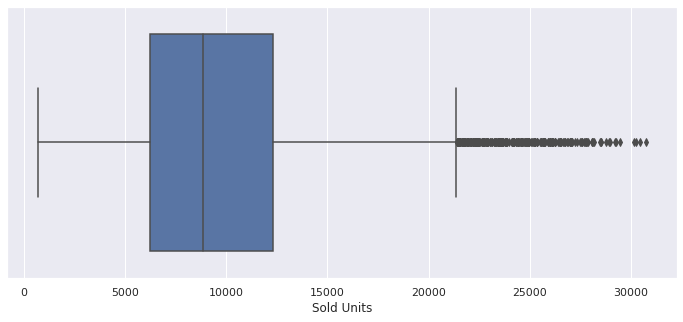

In [ ]:
## Identify outliers in target value -> sold Units
##
import seaborn as sns
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(x=df['Sold Units'])

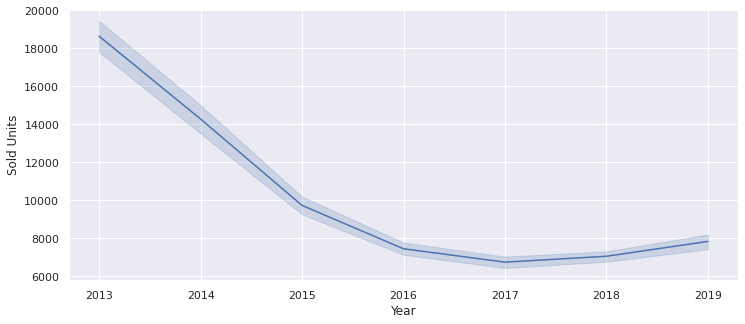

In [ ]:
#Yearly Trend
sns.lineplot( x = df['Year'],y = df['Sold Units'])

In [ ]:
# Before running the Random-Forest-Regressor, we should filter out the “Sold Units” outlier values.
# Removing Outliers - from qualitative analysis.
df=df[df['Sold Units']<21357]
df=df[df['Sold Units']>670]

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

df_final=df[(df['Date'] > '2015-04-02')]
#only taking the data from 2015 onwards, because the data before 2015 is way higher to predict the future...

In [ ]:
df_final.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Weekend
823,2015-04-04,4788,2015,14,4,5,1
824,2015-04-05,2226,2015,14,5,6,1
826,2015-04-07,19644,2015,15,7,1,0
827,2015-04-08,11409,2015,15,8,2,0
828,2015-04-09,12342,2015,15,9,3,0


In [ ]:
#Import ML Algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [ ]:
#Breaking the data and selecting features , predictors
from sklearn.model_selection import train_test_split

predictors=df_final.drop(['Sold Units','Date'],axis=1)
target=df_final['Sold Units']

x_train,x_cv,y_train,y_cv=train_test_split(predictors, target, test_size=0.2, random_state=0)

In [ ]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_cv)
    lin_r= r2_score(y_cv, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor, GradientBoostingRegressor]
s=[]
for i in algos:
    scores(i)

In [ ]:
#Checking the score
models = pd.DataFrame({
    'Method': [LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor, GradientBoostingRegressor],
    'Score': [s[0],s[1],s[2],s[3],s[4],s[5], s[6]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
2,<class 'sklearn.ensemble._forest.RandomForestR...,0.874622
6,<class 'sklearn.ensemble._gb.GradientBoostingR...,0.852688
5,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.787552
0,<class 'sklearn.linear_model._base.LinearRegre...,0.750614
3,<class 'sklearn.linear_model._coordinate_desce...,0.750603
4,<class 'sklearn.linear_model._coordinate_desce...,0.662274
1,<class 'sklearn.neighbors._regression.KNeighbo...,0.620213


### As we have evaluated, the Random-Forest-Regressor is the best algorithm for our given dataset.

In [ ]:
## making model of RandomForestRegressor



In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
test_final = test.drop(['Sales', 'Date'],axis=1)
test_final.head()

,Year,Week,Day,WeekDay,Weekend
0,2019,40,30,0,0
1,2019,40,1,1,0
2,2019,40,2,2,0
4,2019,40,4,4,0
5,2019,40,5,5,1


In [ ]:
pred = model.predict(test_final)

In [ ]:
test['Sales']=pred.round(0)
test.head()

,Date,Sales,Year,Week,Day,WeekDay,Weekend
0,2019-09-30,11419.0,2019,40,30,0,0
1,2019-10-01,12354.0,2019,40,1,1,0
2,2019-10-02,10731.0,2019,40,2,2,0
4,2019-10-04,9666.0,2019,40,4,4,0
5,2019-10-05,4288.0,2019,40,5,5,1


In [ ]:
print(df_final.shape)
print("-----------------")
print(test.shape)
print("-----------------")

combinedDf = df
combinedDf.append(test)

test = test.rename(columns={'Sales':'Sold Units'})
frames = [df_final[['Year', 'Week', 'Sold Units']], test[['Year', 'Week', 'Sold Units']]]
combinedDf = pd.concat(frames, ignore_index=True)

print("-----------------")
print(combinedDf.shape)

(1590, 7)
-----------------
(46, 7)
-----------------
-----------------
(1636, 3)


In [ ]:
print(combinedDf.head(2))
print(combinedDf.tail(2))

   Year  Week  Sold Units
0  2015    14      4788.0
1  2015    14      2226.0
      Year  Week  Sold Units
1634  2019    46      8978.0
1635  2019    46      4272.0


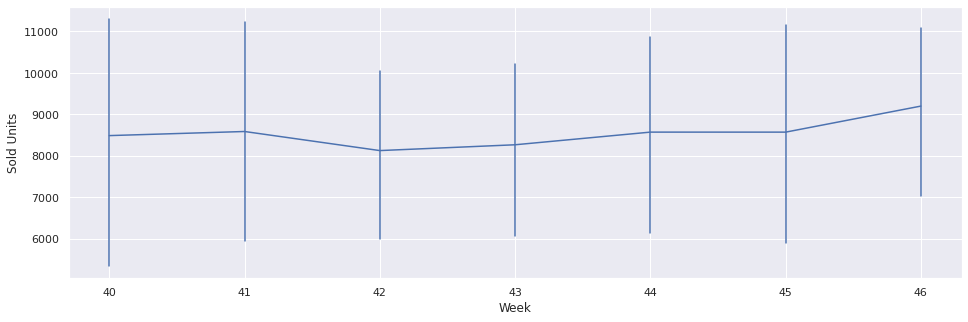

In [ ]:
## TRY one plot at a time
sns.set(rc={'figure.figsize':(16,5)})
combinedDf_2019 = combinedDf.loc[combinedDf['Year'] == 2019]

#sns.lineplot(x = combinedDf_2019['Week'] , y= combinedDf_2019['Sold Units'], err_style='bars', data = combinedDf_2019)

sns.lineplot( x = test['Week'], y = test['Sold Units'], err_style='bars', data = test)

In [ ]:
result = test[['Date','Sold Units']]
result.head()

,Date,Sold Units
0,2019-09-30,11419.0
1,2019-10-01,12354.0
2,2019-10-02,10731.0
4,2019-10-04,9666.0
5,2019-10-05,4288.0


In [ ]:
result.to_csv('finalresult.csv')

#### `Optional & Additional`

## Hyperparameter Tuning the Random Forest Estimator
<hr />
<font color='red'>( used above for time series foerecasting )</font>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

## Watch Unedited Video by Rocky Sir - Explaining Cross Validation
## https://youtu.be/LmxsySwAhoE

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

print(grid.best_score_ , grid.best_params_ )

## Additional Reading : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

0.8737854997415753 {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [ ]:
estimator = grid.best_estimator_
estimator.fit(x_train,y_train)

y_predict_best_model = estimator.predict(test_final)

In [ ]:
test['Sales_Best_Estimator'] = y_predict_best_model.round(0)
test.head()

,Date,Sold Units,Year,Week,Day,WeekDay,Weekend,Sales_Best_Estimator
0,2019-09-30,11419.0,2019,40,30,0,0,11131.0
1,2019-10-01,12354.0,2019,40,1,1,0,11435.0
2,2019-10-02,10731.0,2019,40,2,2,0,10400.0
4,2019-10-04,9666.0,2019,40,4,4,0,9737.0
5,2019-10-05,4288.0,2019,40,5,5,1,4023.0


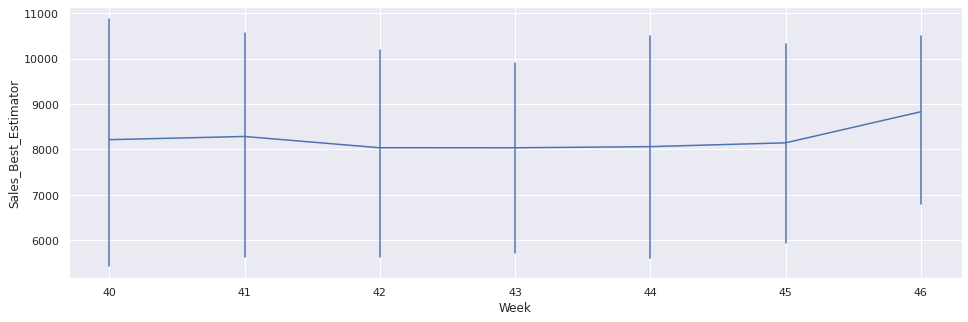

In [ ]:
## TRY one plot at a time
sns.set(rc={'figure.figsize':(16,5)})
combinedDf_2019_from_Best_Estimator = combinedDf.loc[combinedDf['Year'] == 2019]

#sns.lineplot(x = combinedDf_2019['Week'] , y= combinedDf_2019['Sold Units'], err_style='bars', data = combinedDf_2019)

sns.lineplot( x = test['Week'], y = test['Sales_Best_Estimator'], err_style='bars', data = test)

## Different Timeseries Forecast Strategy

<hr />

### 1. Direct Multi-step Forecast Strategy

The direct method involves developing a separate model for each forecast time step.

`Example` : In the case of predicting the temperature for the next two days, we would develop a model for predicting the temperature on day 1 and a separate model for predicting the temperature on day 2.

<pre>
For example:

prediction(t+1) = model1(obs(t-1), obs(t-2), ..., obs(t-n))
prediction(t+2) = model2(obs(t-2), obs(t-3), ..., obs(t-n))

</pre>

<font color='red'> Having one model for each time step is an added computational and maintenance burden, especially as the number of time steps to be forecasted increases beyond the trivial. </font>

### 2. Recursive Multi-step Forecast
The recursive strategy involves using a one-step model multiple times where the prediction for the prior time step is used as an input for making a prediction on the following time step.

In the case of predicting the temperature for the next two days, we would develop a one-step forecasting model. This model would then be used to predict day 1, then this prediction would be used as an observation input in order to predict day 2.

<pre>
For example:
prediction(t+1) = model(obs(t-1), obs(t-2), ..., obs(t-n))
prediction(t+2) = model(prediction(t+1), obs(t-1), ..., obs(t-n))
</pre>

<font color='green'>Because predictions are used in place of observations, the recursive strategy allows prediction errors to accumulate such that performance can quickly degrade as the prediction time horizon increases. </font>



![Image Classification_Image_1](https://drive.google.com/uc?id=1nDNOXx_GhqbwD_pWihyi9Inra452pGG8)

#### To know about our Training Programmes in Data Science and ML space , connect with our `Career Coaches` either Nisha Gaba (80101 91695) or Kritika (87008 48229)